In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

In [2]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [3]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LeakyReLU, ReLU, ELU
from tensorflow.keras.optimizers import SGD

In [4]:
from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [5]:
# x = np.random.random((100, 2))
x = np.linspace(0, 1, 10)
z = np.sin(5 * x) * 2

In [6]:
# validation set
x_val = np.linspace(0, 1, 40)
z_val = np.sin(5 * x_val) * 2

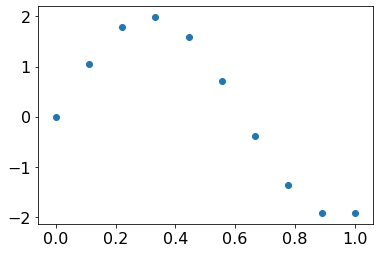

In [7]:
plt.figure()
plt.scatter(x, z)

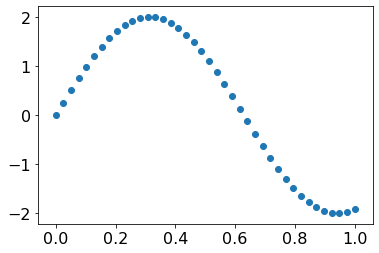

In [8]:
plt.figure()
plt.scatter(x_val, z_val)

# fit with NN

In [9]:
x.shape

(10,)

In [10]:
X_train = x.reshape(-1, 1)
y_train = z.reshape(-1, 1)

X_val = x_val.reshape(-1, 1)
y_val = z_val.reshape(-1, 1)

In [11]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

ysc = StandardScaler()
y_train = ysc.fit_transform(y_train)
y_val = ysc.transform(y_val)

In [12]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(512, activation = 'relu', input_dim = 1))

# Adding the third hidden layer
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

# model.add(Dropout(0.5))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN

# opt = SGD(lr=0.01, momentum=0.9)
opt = 'adam'
# loss = 'mean_absolute_error'
loss = 'mean_squared_error'
# loss = 'mean_absolute_percentage_error'
model.compile(loss=loss, optimizer=opt, metrics=['mse'])
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
# Fitting the ANN to the Training set
history = model.fit(
    X_train,
    y_train,
    epochs = 500,
    verbose=0,
    validation_data=(X_val, y_val),
    callbacks=[TQDMNotebookCallback(leave_inner=False)]
);

In [14]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

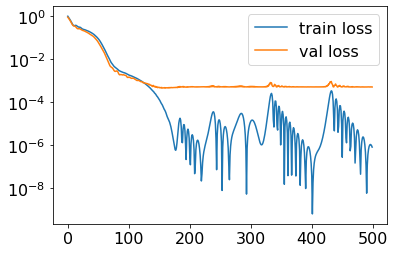

In [15]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

# plt.plot(history.history['mse'], label='train mse')
# plt.plot(history.history['val_mse'], label='val mse')

plt.yscale('log')

plt.legend()
plt.show()

In [16]:
model.metrics_names

['loss', 'mse']

In [17]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_val, y_val, verbose=0)
print('Train: %.6f, Test: %.5f' % (train_acc, test_acc))

Train: 0.000001, Test: 0.00051


In [18]:
# %time model.predict(X_train[0])

In [19]:
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

x_cont = np.linspace(X_train.min(), X_train.max(), 1000).reshape(-1, 1)
pred_cont = model.predict(x_cont)

Text(0.5, 1.0, 'training')

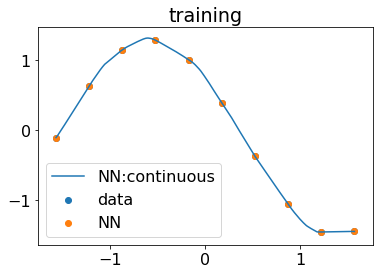

In [20]:
plt.figure()
plt.scatter(X_train, y_train, label='data')
plt.scatter(X_train, pred_train, label='NN')
plt.plot(x_cont, pred_cont, label='NN:continuous')
plt.legend()
plt.title("training")

Text(0.5, 1.0, 'validation')

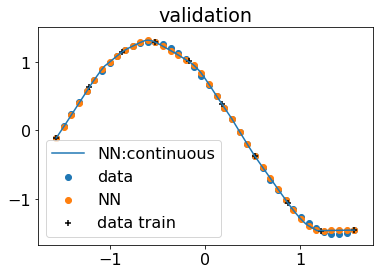

In [21]:
plt.figure()
plt.scatter(X_val, y_val, label='data')
plt.scatter(X_val, pred_val, label='NN')
plt.plot(x_cont, pred_cont, label='NN:continuous')

plt.scatter(X_train, y_train, label='data train', marker='+', c='k')

plt.legend()
plt.title("validation")